In [86]:
import keras
import numpy as np
import tensorflow as tf
from keras import models, layers, activations, losses, optimizers, metrics, utils


In [ ]:
model = models.Sequential([
    layers.Dense(64, activation=activations.relu),
    layers.Dense(10, activation=activations.softmax)
])

model = models.Sequential()
model.add(layers.Dense(64, activation=activations.relu))
model.add(layers.Dense(10, activation=activations.softmax))

#model.weights

In [ ]:
model.build(input_shape=(None, 3))
model.weights

In [ ]:
model.summary()

In [ ]:
model = keras.Sequential(name='model1')
model.add(layers.Dense(64, activation=activations.relu, name='layer1'))
model.add(layers.Dense(10, activation=activations.softmax, name='layer2'))
model.build((None, 3))
model.summary()

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(3,)))
model.add(layers.Dense(64, activation=activations.relu))
model.add(layers.Dense(10, activation=activations.softmax))
model.summary()

In [ ]:
inputs = layers.Input(shape=(3,), name='my_inputs')
features = layers.Dense(64, activation=activations.relu, name='my_features')(inputs)
outputs = layers.Dense(10, activation=activations.softmax, name='my_outputs')(features)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

In [ ]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = layers.Input(shape=(vocabulary_size,), name='title')
body = layers.Input(shape=(vocabulary_size,), name='body')
tags = layers.Input(shape=(num_tags,), name='tags')

features = layers.Concatenate(name='concatenation')([title, body, tags])
features = layers.Dense(64, activation=activations.relu, name='my_dense')(features)

priority = layers.Dense(1, activation=activations.sigmoid, name='priority')(features)
department = layers.Dense(num_departments, activation=activations.softmax, name='department')(features)

model = keras.Model(inputs=[title, body, tags], outputs=[priority, department])
model.summary()

In [ ]:
num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.uniform(0, 1, size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer=optimizers.RMSprop(),
              loss=[losses.mean_squared_error, losses.categorical_crossentropy],
              metrics=[[metrics.mean_absolute_error], [metrics.categorical_accuracy]])

model.fit([title_data, body_data, tags_data], [priority_data, department_data], epochs=1)
model.evaluate([title_data, body_data, tags_data], [priority_data, department_data])
priority_predicts, department_predicts = model.predict([title_data, body_data, tags_data])

In [ ]:
model.compile(optimizer=optimizers.RMSprop(),
              loss={'priority': losses.mean_squared_error, 'department': losses.categorical_crossentropy},
              metrics={'priority': metrics.mean_absolute_error, 'department': metrics.categorical_accuracy})

model.fit({'title': title_data, 'body': body_data, 'tags': tags_data},
          {'priority': priority_data, 'department': department_data},
          epochs=1)

model.evaluate({'title': title_data, 'body': body_data, 'tags': tags_data},
               {'priority': priority_data, 'department': department_data})

priority_predicts, department_predicts = model.predict({'title': title_data, 'body': body_data, 'tags': tags_data})

In [ ]:
utils.plot_model(model, 'ticket_classifier.png')

In [ ]:
utils.plot_model(model, 'ticket_classifier.png', show_shapes=True)

In [ ]:
[layer.name for layer in model.layers]

In [ ]:
model.layers[3].input

In [ ]:
model.layers[3].output

In [ ]:
features = model.layers[4].output

difficulty = layers.Dense(3, activation=activations.softmax, name='difficulty')(features)

new_model = keras.Model(inputs=[title, body, tags], outputs=[priority, department, difficulty])

keras.utils.plot_model(new_model, show_shapes=True)

In [ ]:
class TicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation=activations.relu)
        self.priority_scorer = layers.Dense(1, activation=activations.sigmoid)
        self.department_classifier = layers.Dense(num_departments, activation=activations.softmax)
    
    def call(self, inputs):
        title = inputs['title']
        body = inputs['body']
        tags = inputs['tags']

        features = self.concat_layer([title, body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return {'priority': priority, 'department': department}


In [ ]:
model = TicketModel(num_departments=4)

model({'title': title_data, 'body': body_data, 'tags': tags_data})

In [ ]:
model.compile(optimizer=optimizers.RMSprop(),
              loss={'priority': losses.mean_squared_error, 'department': losses.categorical_crossentropy},
              metrics={'priority': metrics.mean_absolute_error, 'department': metrics.categorical_accuracy})

model.fit({'title': title_data, 'body': body_data, 'tags': tags_data},
          {'priority': priority_data, 'department': department_data},
          epochs=1)

model.evaluate({'title': title_data, 'body': body_data, 'tags': tags_data},
               {'priority': priority_data, 'department': department_data})

model.predict({'title': title_data, 'body': body_data, 'tags': tags_data})

In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = activations.sigmoid
        else:
            num_units = num_classes
            activation = activations.softmax
        self.dense = layers.Dense(num_units, activation=activation)
    
    def call(self, inputs):
        return self.dense(inputs)

inputs = layers.Input(shape=(3,))
features = layers.Dense(64, activation=activations.relu)(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


In [ ]:
utils.plot_model(model, show_shapes=True)

In [ ]:
inputs = layers.Input(shape=(64,))
outputs = layers.Dense(1, activation=activations.sigmoid)(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
    def __init__(self):
        super().__init__()
        self.dense = layers.Dense(64, activation=activations.relu)
        self.classifier = binary_classifier
    
    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)
    
model = MyModel()

model.build(input_shape=(0, 3))
model.summary()

In [ ]:
utils.plot_model(model)

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist

def get_mnist_model():
    inputs = layers.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation=activations.relu)(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation=activations.softmax)(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype(np.float32) / 255
test_images = test_images.reshape((10000, 28 * 28)).astype(np.float32) / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=[metrics.sparse_categorical_accuracy])
model.fit(train_images, train_labels, epochs=3, validation_data=[val_images, val_labels])
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

In [ ]:
class RMSE(metrics.Metric):
    def __init__(self, name='rmse', **kwargs):
        super().__init__(name, **kwargs)
        self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros')
        self.total_samples = self.add_weight(name='total_samples', initializer='zeros', dtype=tf.int32)
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        #print('y_pred', y_pred)
        #rint('y_pred.shape', y_pred.shape)
        #print('tf.shape(y_pred)[0]', tf.shape(y_pred)[0])
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        self.total_samples.assign_add(tf.shape(y_pred)[0])

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))
    
    def reset_state(self):
        self.mse_sum.assign(0)
        self.total_samples.assign(0)
    
model = get_mnist_model()
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=[metrics.sparse_categorical_accuracy, RMSE()])

model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

In [ ]:
from keras import callbacks

callbacks_list = [
    callbacks.EarlyStopping(
        monitor='val_sparse_categorical_accuracy',
        patience=2
    ),
    callbacks.ModelCheckpoint(
        filepath='tmp/',
        monitor='val_loss',
        save_best_only=True
    )
]

model = get_mnist_model()
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=[metrics.sparse_categorical_accuracy])
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels), callbacks=callbacks_list)

In [ ]:
model = keras.models.load_model('tmp/')

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2969 - sparse_categorical_accuracy: 0.9118 - val_loss: 0.1452 - val_sparse_categorical_accuracy: 0.9580
Epoch 2/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1613 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.1188 - val_sparse_categorical_accuracy: 0.9675
Epoch 3/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1291 - sparse_categorical_accuracy: 0.9634 - val_loss: 0.1079 - val_sparse_categorical_accuracy: 0.9731
Epoch 4/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1139 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.0969 - val_sparse_categorical_accuracy: 0.9744
Epoch 5/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1049 - sparse_categorical_accuracy: 0.9711 - val_loss: 0.0987 - val_sparse_categorical_accuracy: 0.9746
Epoch 6/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0947 - spars

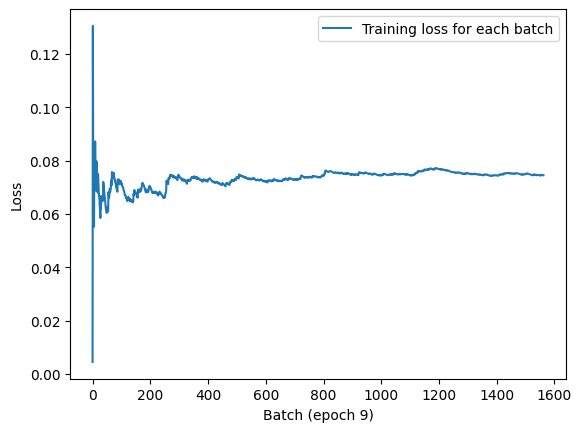

In [77]:
from matplotlib import pyplot as plt

class LossHistory(callbacks.Callback):
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get('loss'))
    
    def on_epoch_begin(self, epoch, logs):
        self.per_batch_losses = []


    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label='Training loss for each batch')
        plt.xlabel(f'Batch (epoch {epoch})')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig(f'plot_at_epoch_{epoch}')

model = get_mnist_model()
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=[metrics.sparse_categorical_accuracy])
model.fit(train_images, train_labels, epochs=10, callbacks=[LossHistory()], validation_data=(val_images, val_labels))

In [78]:
model = get_mnist_model()
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.sparse_categorical_crossentropy,
              metrics=[metrics.sparse_categorical_accuracy])

tensorboard = callbacks.TensorBoard(log_dir='tmp_log_dir')
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2946 - sparse_categorical_accuracy: 0.9119 - val_loss: 0.1477 - val_sparse_categorical_accuracy: 0.9584
Epoch 2/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1577 - sparse_categorical_accuracy: 0.9552 - val_loss: 0.1105 - val_sparse_categorical_accuracy: 0.9696
Epoch 3/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1282 - sparse_categorical_accuracy: 0.9637 - val_loss: 0.1083 - val_sparse_categorical_accuracy: 0.9729
Epoch 4/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1129 - sparse_categorical_accuracy: 0.9686 - val_loss: 0.1008 - val_sparse_categorical_accuracy: 0.9743
Epoch 5/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1012 - sparse_categorical_accuracy: 0.9719 - val_loss: 0.0918 - val_sparse_categorical_accuracy: 0.9766
Epoch 6/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0941 - spars

In [79]:
%load_ext tensorboard

In [80]:
%tensorboard --logdir tmp_log_dir

Reusing TensorBoard on port 6006 (pid 31087), started 0:05:01 ago. (Use '!kill 31087' to kill it.)

In [81]:
metric = metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predicts = [[1, 0, 0],
           [0, 1, 0],
           [0, 0, 1]]
metric.update_state(targets, predicts)
current_result = metric.result()
print(current_result)

tf.Tensor(1.0, shape=(), dtype=float32)


In [83]:
values = [0, 1, 2, 3, 4]
mean_tracker = metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(mean_tracker.result())

tf.Tensor(2.0, shape=(), dtype=float32)


In [93]:
model = get_mnist_model()

loss_fn = losses.SparseCategoricalCrossentropy()
optimizer = optimizers.RMSprop()
my_metrics = [metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in my_metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs['loss'] = loss_tracking_metric.result()
    return logs

def reset_metrics():
    for metric in my_metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [97]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f'Results at the end of epoch {epoch}')
    for key, value in logs.items():
        print(f'...{key}: {value:.4f}')

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9759
...loss: 0.0932
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9766
...loss: 0.0888
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9767
...loss: 0.0841


In [99]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in my_metrics:
        metric.update_state(targets, predictions)
        logs['val_' + metric.name] = metric.result()
        loss_tracking_metric.update_state(loss)
        logs['val_loss'] = loss_tracking_metric.result()
        return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print('Evaluation results:')
for key, value in logs.items():
    print(f'{key}: {value:.4f}')

Evaluation results:
val_sparse_categorical_accuracy: 0.9763
val_loss: 0.1015


In [102]:
loss_fn = losses.SparseCategoricalCrossentropy()
loss_tracker = metrics.Mean(name='loss')

class MyModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {'loss': loss_tracker.result()}
    
    @property
    def metrics(self):
        return [loss_tracker]

In [103]:
inputs = layers.Input(shape=(28 * 28,))
features = layers.Dense(512, activation=activations.relu)(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation=activations.softmax)(features)
model = MyModel(inputs=inputs, outputs=outputs)

model.compile(optimizer=optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3


KeyError: in user code:

    File "/home/rli/src/dl_python_chollet/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/home/rli/src/dl_python_chollet/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/rli/src/dl_python_chollet/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/tmp/ipykernel_4400/3108172899.py", line 11, in train_step
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    File "/home/rli/src/dl_python_chollet/.venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1230, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "/home/rli/src/dl_python_chollet/.venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "/home/rli/src/dl_python_chollet/.venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1260, in _internal_apply_gradients
        return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/home/rli/src/dl_python_chollet/.venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1352, in _distributed_apply_gradients_fn
        distribution.extended.update(
    File "/home/rli/src/dl_python_chollet/.venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1349, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "/home/rli/src/dl_python_chollet/.venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 233, in _update_step
        raise KeyError(

    KeyError: 'The optimizer cannot recognize variable dense_90/kernel:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.RMSprop.'
